Date : 20 Feb Lab 5

The health_risk_data comprises medical records of 800 individuals

In [1]:
import pandas as pd
df=pd.read_csv("health_risk_data.csv")
df

age        bmi  waist_circumference  systolic_bp  diastolic_bp  \
0    49.967142  30.753135           106.721491   109.173937     81.851755   
1    43.617357  24.935821            94.149756   122.652313     84.254449   
2    51.476885  27.384483            92.615870   111.799799     82.222899   
3    60.230299  25.150899            84.032186   115.925173     92.788658   
4    42.658466  25.262015            86.003335   145.101781     70.476836   
..         ...        ...                  ...          ...           ...   
795  55.531529  22.961077            73.115544    91.799849     80.284576   
796  44.604448  29.476617            98.558861   130.690680     59.221882   
797  51.815007  35.229982           118.285150    91.752747     76.797022   
798  45.283184  27.083175            95.827449   114.415214     96.433782   
799  45.297561  24.087988            84.654681   126.559698     83.606479   

     mean_arterial_pressure  fasting_glucose     hba1c  glucose_monitor_avg  \
0                 89.232162       110.140405  7.747751           111.790974   
1                 96.991330        98.852093  7.434487            94.782039   
2                 92.117899        72.091030  6.598568            70.262644   
3                101.446091        85.841781  7.366348            88.363135   
4                 92.618101        94.745065  7.467980            97.352312   
..                      ...              ...       ...                  ...   
795               81.594988        65.144561  6.697116            66.633941   
796               84.017184       108.188771  7.780712           110.439549   
797               77.883520        94.466565  6.948320            93.944772   
798               98.326878       102.267888  7.832056           111.145342   
799               99.402580       109.179880  7.345255           101.783900   

     total_cholesterol  ldl_cholesterol  hdl_cholesterol  resting_hr  \
0           204.189550       142.602432        57.177317   48.024990   
1           201.950739       136.329015        54.816690   82.687139   
2           224.398412       155.355139        69.802697   71.902232   
3           174.684384       129.426386        55.580815   66.203755   
4           147.689822       116.161442        46.307795   78.571584   
..                 ...              ...              ...         ...   
795         266.295670       168.250479        77.631474   61.406008   
796         209.809835       141.725997        58.078811   65.297443   
797         174.946265       131.438943        52.296062   84.985464   
798         249.587391       187.273148        77.725012   67.282700   
799         262.333328       195.510463        77.079114   51.302683   

     activity_hr  device_artifact_signal  measurement_variability_index  \
0      67.708474                0.906834                       1.174814   
1     102.294197               -1.451835                      -1.878981   
2      97.894075               -0.664701                      -0.327795   
3      86.275437               -0.121075                      -0.041660   
4      96.463672                1.365560                       0.015909   
..           ...                     ...                            ...   
795    85.654232               -1.181194                       0.024480   
796    75.733186               -0.072822                      -0.962669   
797   113.871937                0.838014                      -0.633640   
798    89.701905               -0.100696                      -2.256725   
799    71.091024               -0.946314                       1.607019   

     risk_label  
0             1  
1             0  
2             0  
3             0  
4             0  
..          ...  
795           0  
796           1  
797           0  
798           1  
799           1  

[800 rows x 17 columns]

# a) Perform a multivariate analysis of the given dataset using the visualization techniques discussed in Labs 3 and 4 (e.g., pair plots, heatmaps, and facet grids) to explore relationships among variables.

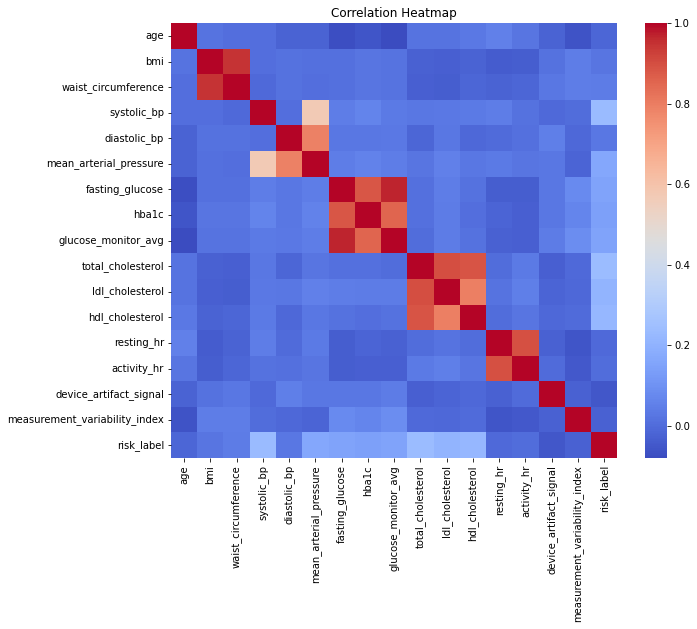

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

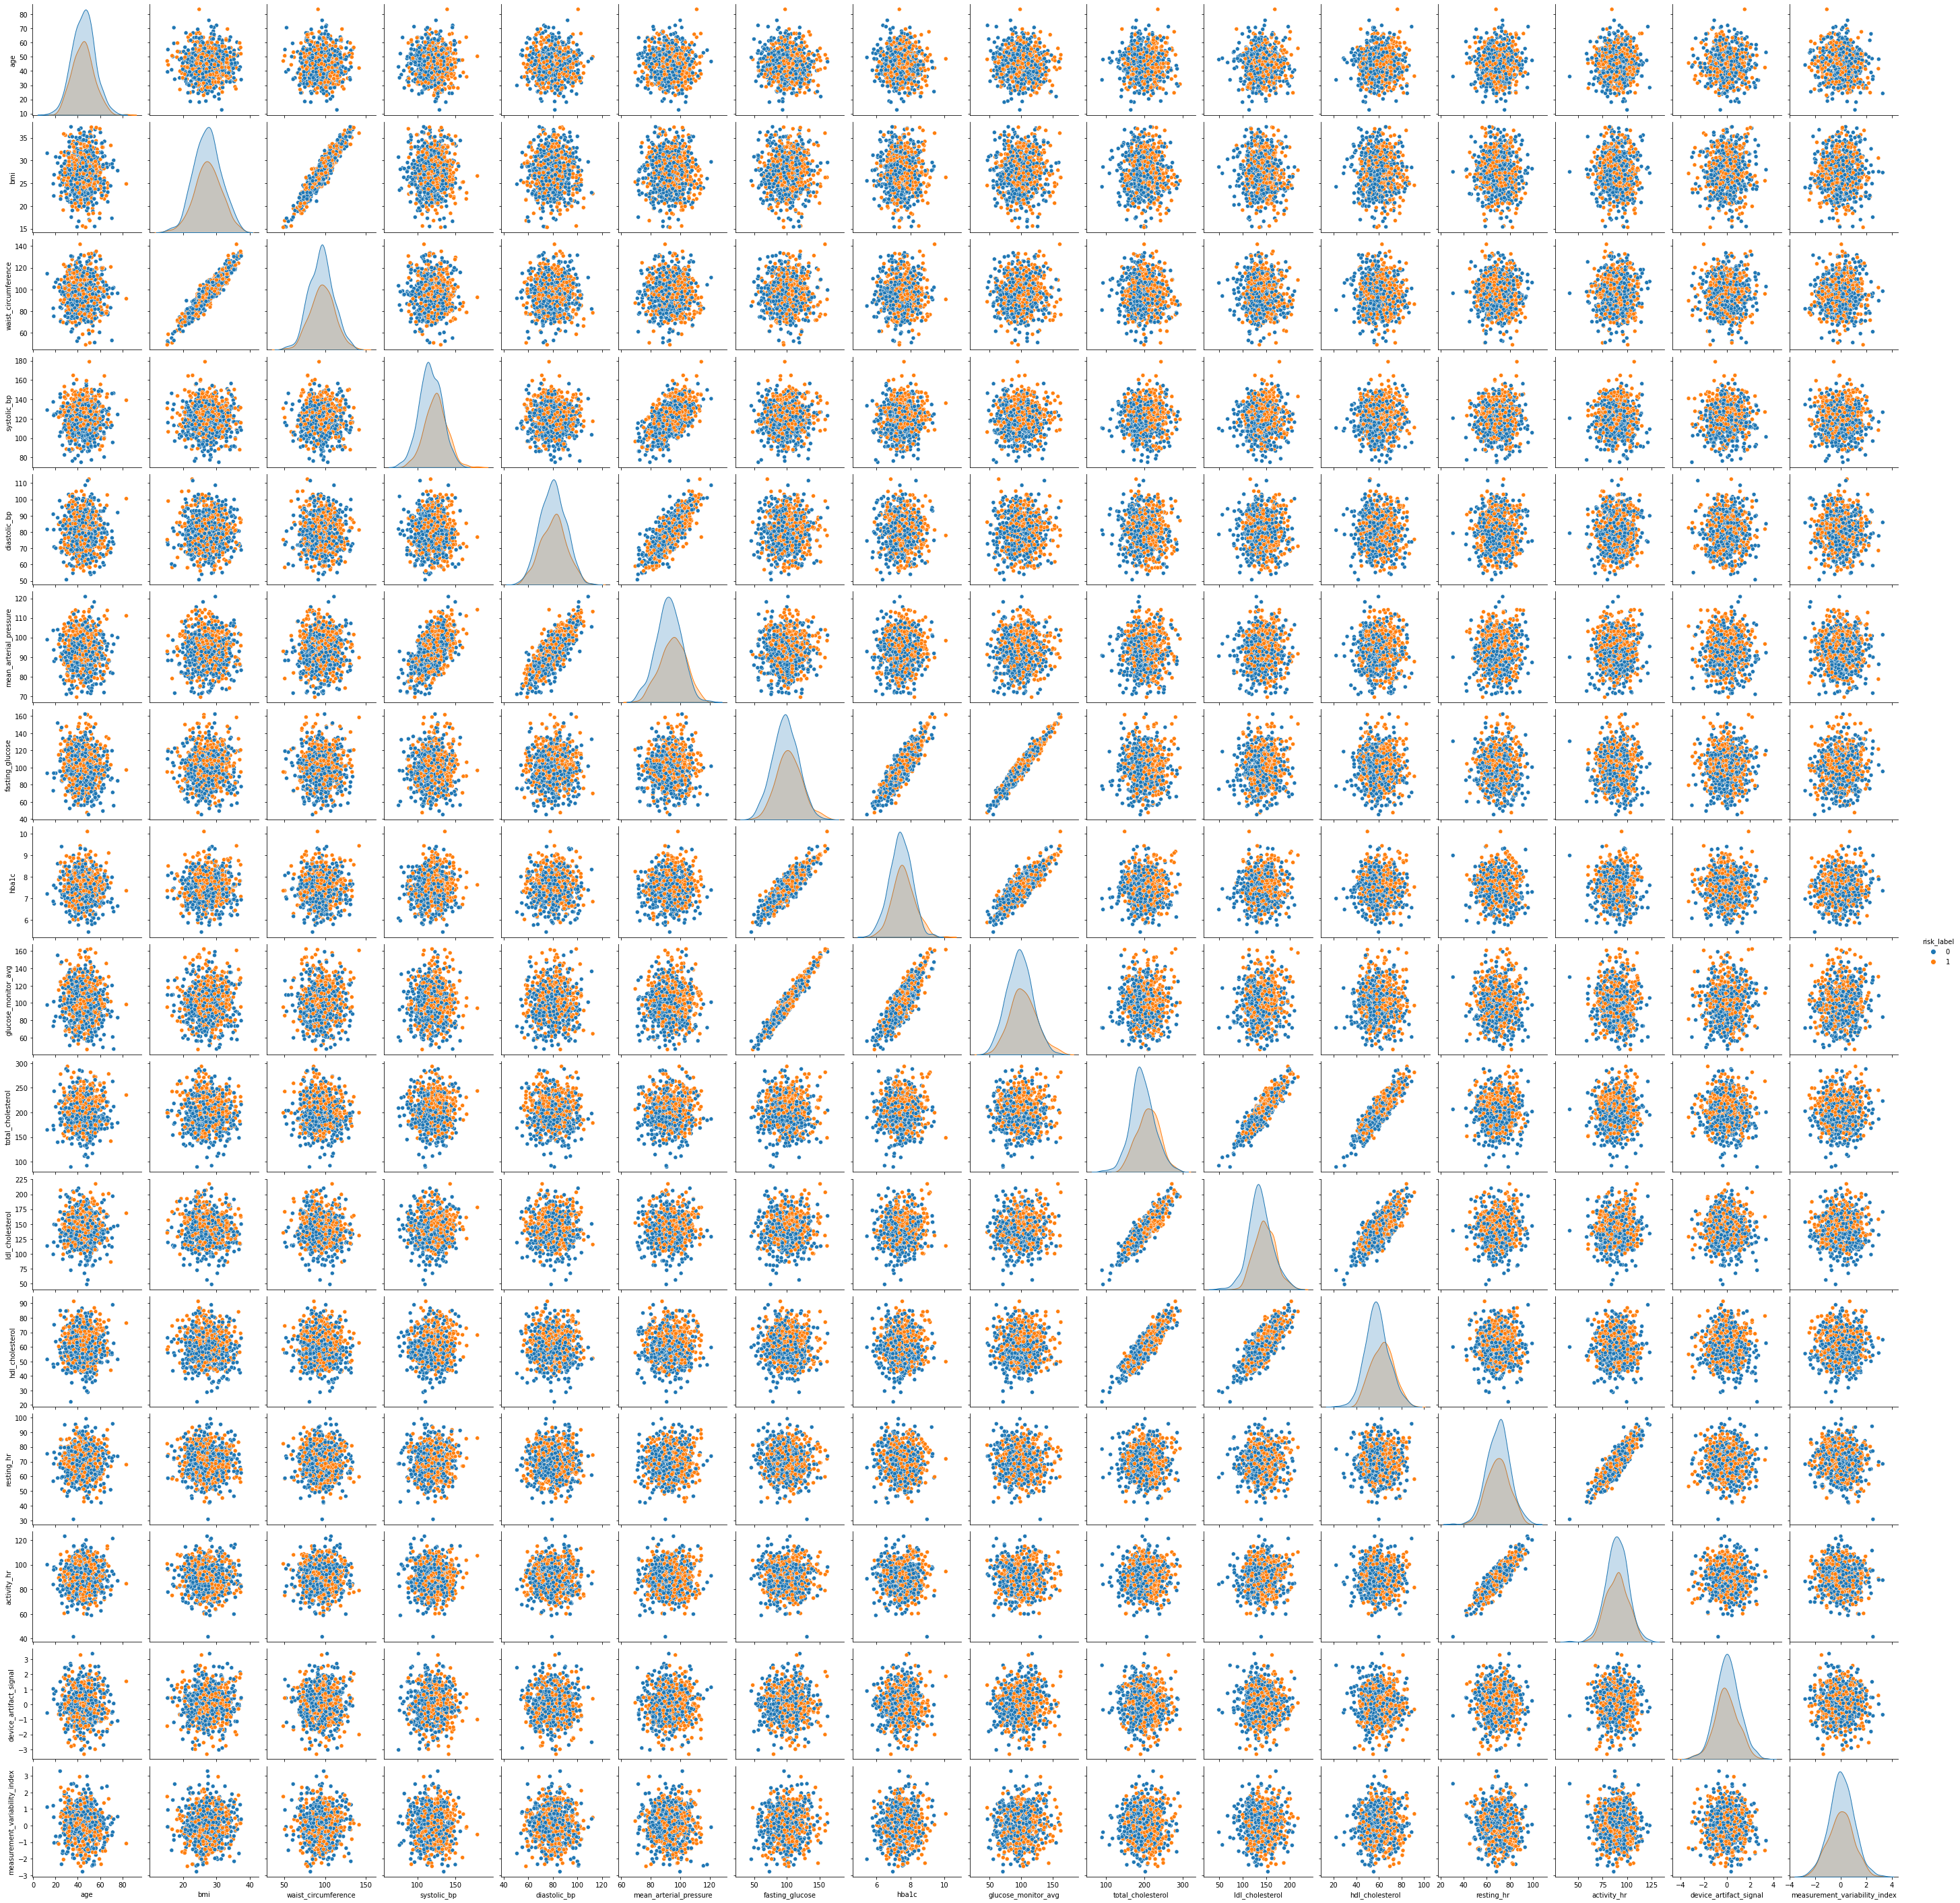

In [3]:
sns.pairplot(
    df,
    hue='risk_label'
)
plt.show()

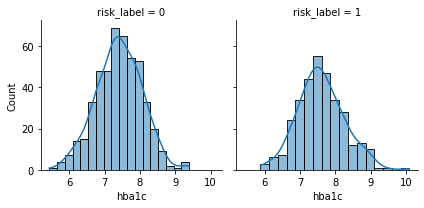

In [4]:
g = sns.FacetGrid(df, col="risk_label")
g.map(sns.histplot, "hba1c", kde=True)
plt.show()

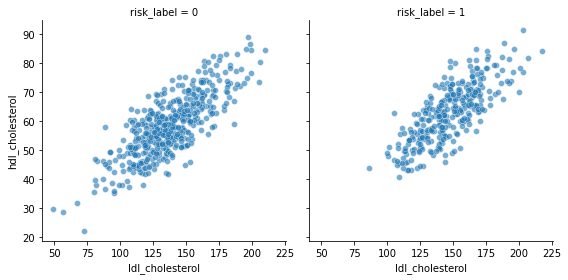

In [5]:
g = sns.FacetGrid(df, col="risk_label", height=4)
g.map(sns.scatterplot, "ldl_cholesterol", "hdl_cholesterol", alpha=0.6)
plt.show()

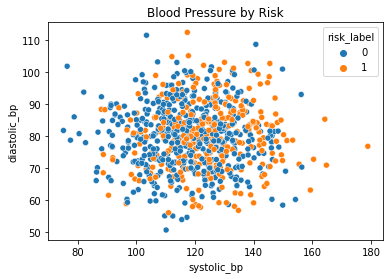

In [6]:
sns.scatterplot(
    data=df,
    x='systolic_bp',
    y='diastolic_bp',
    hue='risk_label'
)
plt.title("Blood Pressure by Risk")
plt.show()

#  b) Identify redundancy among the features by analysing correlations and overlapping patterns observed in the visualizations.

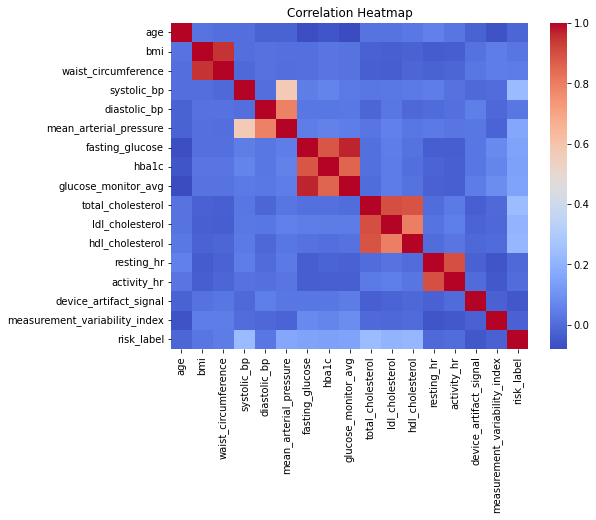

Highly Correlated Feature Pairs:

waist_circumference and bmi -> 0.95
hba1c and fasting_glucose -> 0.88
glucose_monitor_avg and fasting_glucose -> 0.97
glucose_monitor_avg and hba1c -> 0.85
ldl_cholesterol and total_cholesterol -> 0.90
hdl_cholesterol and total_cholesterol -> 0.89
activity_hr and resting_hr -> 0.90


In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


plt.figure(figsize=(8,6))
corr = df.corr()
sns.heatmap(corr, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


print("Highly Correlated Feature Pairs:\n")
for i in range(len(corr.columns)):
    for j in range(i):
        if abs(corr.iloc[i, j]) > 0.8:
            print(f"{corr.columns[i]} and {corr.columns[j]} -> {corr.iloc[i, j]:.2f}")

# c) Justify the need for applying PCA by explaining why dimensionality reduction may be preferable to using all features directly in the classification model. 

Applying Principal Component Analysis (PCA) is necessary because the dataset contains several highly correlated features. From the correlation heatmap and pair plots, we observed strong relationships among:

Blood pressure variables (systolic_bp, diastolic_bp, mean_arterial_pressure)

Glucose variables (fasting_glucose, hba1c, glucose_monitor_avg)

Cholesterol variables (total_cholesterol, ldl_cholesterol)

Obesity measures (bmi, waist_circumference)

These correlations indicate multicollinearity, meaning multiple features provide overlapping information.

# Generate a Scree Plot and determine the number of principal components (PCs) required to capture at least 95% of the total variance in the dataset. Train and evaluate a Random Forest classifier on both the original and PCA-transformed datasets and compare the results to assess whether PCA leads to any improvement in classification accuracy and computation time.

In [8]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [9]:
X = df.drop(columns=["risk_label"])
y = df["risk_label"]

In [10]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [11]:
rf = RandomForestClassifier(n_estimators=200,random_state=43,class_weight="balanced")
rf.fit(X1_train, y1_train)

RandomForestClassifier(class_weight='balanced', n_estimators=200,
                       random_state=43)

Accuracy: 0.6375

Classification Report:
               precision    recall  f1-score   support

           0       0.68      0.75      0.71        96
           1       0.56      0.47      0.51        64

    accuracy                           0.64       160
   macro avg       0.62      0.61      0.61       160
weighted avg       0.63      0.64      0.63       160



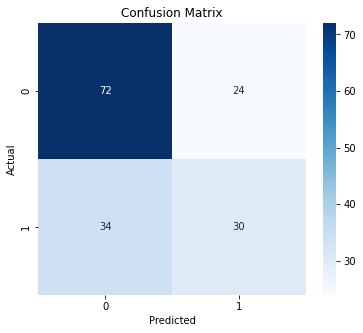

In [12]:
y1_pred = rf.predict(X1_test)
print("Accuracy:", accuracy_score(y1_test, y1_pred))
print("\nClassification Report:\n", classification_report(y1_test, y1_pred))
cm = confusion_matrix(y1_test, y1_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# PCA 

In [13]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

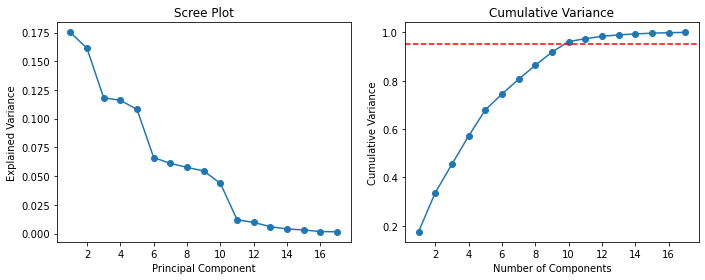

In [14]:
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(range(1, len(explained_variance)+1),explained_variance,marker='o')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance')
plt.subplot(1,2,2)
plt.plot(range(1, len(cumulative_variance)+1),cumulative_variance,marker='o')
plt.axhline(y=0.95, color='r', linestyle='--')
plt.title('Cumulative Variance')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Variance')
plt.tight_layout()
plt.show()

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42, stratify=y)

In [16]:
rf = RandomForestClassifier(n_estimators=200,random_state=43,class_weight="balanced")
rf.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', n_estimators=200,
                       random_state=43)

# After PCA

Accuracy: 0.99375

Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99        96
           1       1.00      0.98      0.99        64

    accuracy                           0.99       160
   macro avg       0.99      0.99      0.99       160
weighted avg       0.99      0.99      0.99       160



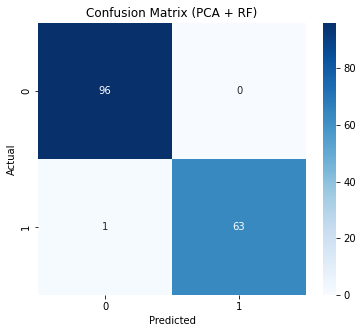

In [17]:
y_pred = rf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix (PCA + RF)")
plt.show()